## Feature Selection: Correlation

**Correlation** of a variable tells that how is that variable related to the target. If the correlation between a variable and the target is "1", this means they are highly correlated and are bound by direct proportionality i.e. if variable value increases, the target value increases.

If the correlation between the variable and the target is "-1",this means they are inversely correlated i.e. they are bound by an inverse relation i.e. if the value of the variable increases, the value for the target decreases.

It is good to have a high correlation between the variable/feature and the target but not of much importance between two variables/features and in that cases, if we know one variable/feature, we can get the other by correlation.

In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
# Load Dataset
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [6]:
data = df[numerical_features]

In [7]:
data.shape

(303, 14)

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
X = data.drop(['target'], axis=1)
X.shape

(303, 13)

In [11]:
y = data['target']
y.shape

(303,)

In [13]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=135)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

<AxesSubplot:>

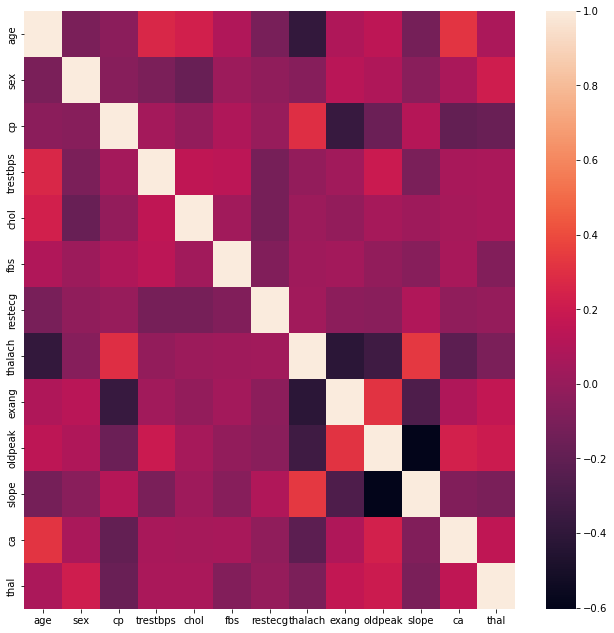

In [14]:
# Visualize Correlated Features
corr = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corr)

### Brute Force Method to Find Correlated Features

In [15]:
# Brute Force Method to find Correlation between features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
correlated_features = correlation(data=X_train, threshold=0.8)
len(set(correlated_features))

0

In [17]:
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((242, 13), (61, 13))

### Calculating Groups of Higly Correlated Features

In [19]:
# Load Dataset
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
# Get Numerical features from dataset
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [21]:
data = df[numerical_features]

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X = data.drop(['target'], axis=1)
X.shape

(303, 13)

In [25]:
y = data['target']
y.shape

(303,)

In [26]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((212, 13), (212,), (91, 13), (91,))

In [27]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
# Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.8]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix.head()

,feature1,feature2,Correlation


In [28]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))

Found 0 correlated feature groups
out of 13 total features.


In [29]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

In the tables above, we get the correlation values for the features and see that howthey are correlated to each other along with their correlation value. Now the question is which one of the features to remove and which to keep? To decide that, we can look at the groups individually and keep the group with the highest correlation and least amount of missing data.

In [30]:
# Investigating features further within one group
group = correlated_groups[3]
group

IndexError: list index out of range

In [28]:
# Select features with less missing data
for features in list(group.feature2.unique()) + ['v17']:
    print(X_train[feature].isnull().sum())

15252
15252
15252
15252
15252
15252
15252


Since, all of the features contain the same amount of missing data, so this might not be the best way to decide which feature to keep. So, we use RFC for this. Using Random Forest Classifier, we find out the features that are most predictive and select that.

In [29]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique()) + ['v17']
rfc = RandomForestClassifier(n_estimators=20, random_state=101, max_depth=4)
rfc.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=101, verbose=0, warm_start=False)

In [30]:
# Get Feature Importance using RFC
importance = pd.concat([pd.Series(features), pd.Series(rfc.feature_importances_)], axis=1)
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
6,v17,0.229342
2,v8,0.178029
3,v105,0.139498
5,v54,0.128159
0,v63,0.125523
1,v25,0.110469
4,v89,0.088979


From above table, we can see that v17 does the best job and hence we'll select that and remove the rest of the features.